# Our ears are sensors for vibrations
"The general range of hearing for young people is 20 Hz to 20 kHz."	20-20,000 Hz

*Acoustics. National Physical Laboratory (NPL), 2003.* 

CDs are sampled at 44.1 kHz and 48 kHz is another commonly used sampling rate. These two sample rate are usually enough to capture all sounds that human beings can hear according to the Nyquist theorem.


In [1]:
import numpy as np
from utility.transform import *
import sounddevice as sd
%matplotlib inline
import matplotlib.pyplot as plt

def plot(x, y, limit=0):
    if len(x) != len(y):
        print("Error: cannot plot when x, y are not equal")
        return
    if limit > 0:
        plt.plot(x[0:limit], y[0:limit], 'r')
    else:
        plt.plot(x, y, 'r')

In [2]:
fs = 8000      # Sampling frequency CD rates at 44100 (44.1 kHz)
duration = 5   # In seconds
t = np.linspace(0, duration, fs * duration)

A random signal played by the speaker is basically noise.

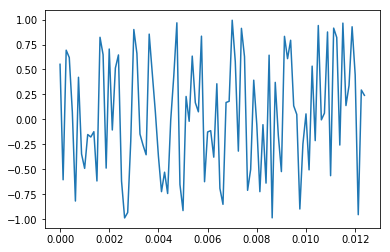

In [3]:
# Play a random noise for a few seconds
noise = np.random.uniform(-1, 1, fs * duration)
plot(t, noise, limit=100)

sd.play(noise, fs)

Now lets play a sine wave and look at it in frequency domain

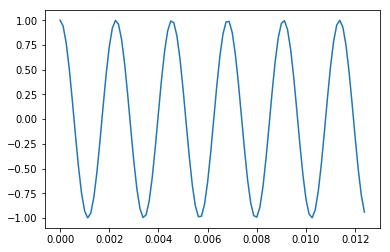

In [32]:
A_freq = 440
note_A = np.cos(2 * np.pi * A_freq * t)  #  sine(2*pi*f*t)
plot(t, note_A, limit=100)

sd.play(note_A, fs)

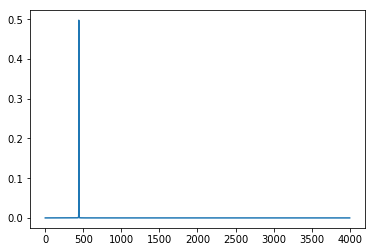

In [30]:
f, spectrum = fft_1sided(note_A, fs)
plot(f, spectrum)

# Note and its tone


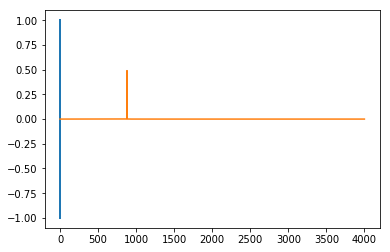

In [43]:
high_A_freq = 880
note_high_A = np.cos(2 * np.pi * high_A_freq * t)  #  sine(2*pi*f*t)

sd.play(note_high_A, fs)

plot(t, note_high_A, limit=100)

f, spectrum_high_A = fft_1sided(note_high_A, fs)
plot(f, spectrum_high_A)

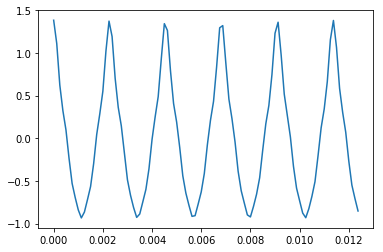

In [25]:
note_A_instrument = np.cos(2 * np.pi * A_freq * t)  # base note
for i in range(2, 6):
    note_A_instrument += 0.3 / i * np.cos(i * 2 * np.pi * A_freq * t)  #  sine(2*pi*f*t)
    
sd.play(note_A_instrument, fs)

plot(t, note_A_instrument, limit=100)

f, spectrum = fft_1sided(note_A_instrument, fs)
plot(f, spectrum)

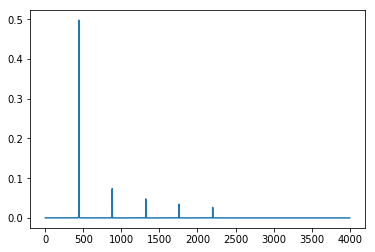